In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# make filepath to netflix2019.csv
df = pd.read_csv("netflix2019.csv")
imdb = pd.read_csv("imdb_top_1000.csv")

In [99]:
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [100]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


### Amount of shows compared to the amount of movies

<AxesSubplot:ylabel='type'>

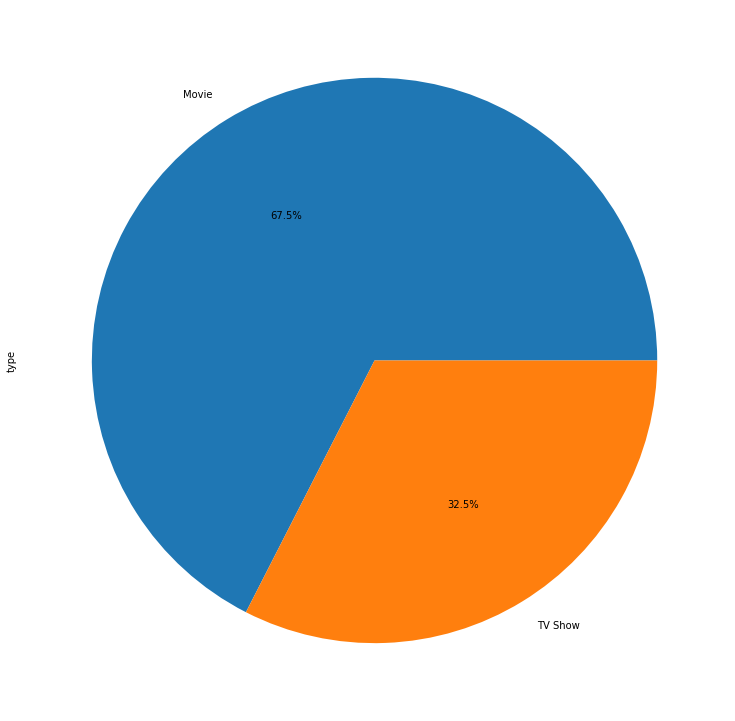

In [101]:
#amount of movies and tv shows
amount_of_shows = df['type'].value_counts()
amount_of_shows.plot(kind='pie', autopct='%1.1f%%')

### Number of shows and movies based on their ratings

<AxesSubplot:>

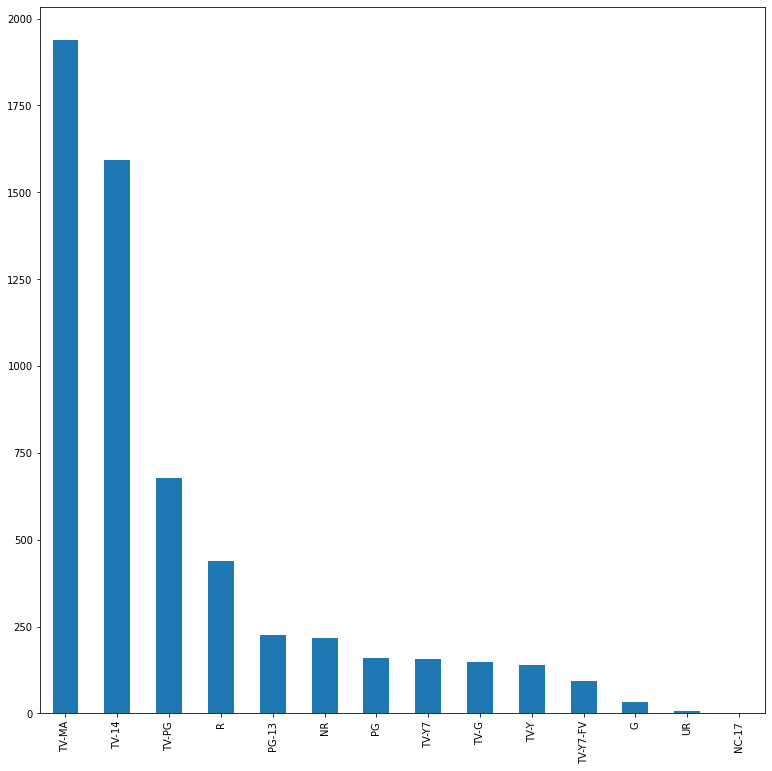

In [102]:
ratingstypes = df['rating'].value_counts()
ratingstypes.plot(kind='bar')

In [103]:
# ratingstypes.to_csv('ratingstypes.csv')

### How many movies and shows released per year

In [104]:
release_year = df['release_year'].value_counts()
release_year.sort_values(ascending=True).tail(15)

2005      52
2006      57
2007      61
2008     102
2009     106
2011     127
2010     137
2012     174
2013     232
2014     281
2015     502
2019     762
2016     818
2017     928
2018    1040
Name: release_year, dtype: int64

In [105]:
# release_year.sort_values(ascending=True).tail(10).to_csv('release_year.csv')

In [106]:
shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [107]:
movies_release = movies['release_year'].value_counts()
x = movies_release.sort_values(ascending=True).tail(10)
# x.to_csv('movies_release.csv')

In [108]:
shows_release = shows['release_year'].value_counts()
x = shows_release.sort_values(ascending=True).tail(10)
# x.to_csv('shows_release.csv')

### Number of shows and movies per country

In [109]:
df['country'] = df['country'].replace(np.nan, 'Unknown')

In [110]:
country_codes = {
    'afghanistan': 'AFG',
    'albania': 'ALB',
    'algeria': 'DZA',
    'american samoa': 'ASM',
    'andorra': 'AND',
    'angola': 'AGO',
    'anguilla': 'AIA',
    'antigua and barbuda': 'ATG',
    'argentina': 'ARG',
    'armenia': 'ARM',
    'aruba': 'ABW',
    'australia': 'AUS',
    'austria': 'AUT',
    'azerbaijan': 'AZE',
    'bahamas': 'BHM',
    'bahrain': 'BHR',
    'bangladesh': 'BGD',
    'barbados': 'BRB',
    'belarus': 'BLR',
    'belgium': 'BEL',
    'belize': 'BLZ',
    'benin': 'BEN',
    'bermuda': 'BMU',
    'bhutan': 'BTN',
    'bolivia': 'BOL',
    'bosnia and herzegovina': 'BIH',
    'botswana': 'BWA',
    'brazil': 'BRA',
    'british virgin islands': 'VGB',
    'brunei': 'BRN',
    'bulgaria': 'BGR',
    'burkina faso': 'BFA',
    'burma': 'MMR',
    'burundi': 'BDI',
    'cabo verde': 'CPV',
    'cambodia': 'KHM',
    'cameroon': 'CMR',
    'canada': 'CAN',
    'cayman islands': 'CYM',
    'central african republic': 'CAF',
    'chad': 'TCD',
    'chile': 'CHL',
    'china': 'CHN',
    'colombia': 'COL',
    'comoros': 'COM',
    'congo democratic': 'COD',
    'Congo republic': 'COG',
    'cook islands': 'COK',
    'costa rica': 'CRI',
    "cote d'ivoire": 'CIV',
    'croatia': 'HRV',
    'cuba': 'CUB',
    'curacao': 'CUW',
    'cyprus': 'CYP',
    'czech republic': 'CZE',
    'denmark': 'DNK',
    'djibouti': 'DJI',
    'dominica': 'DMA',
    'dominican republic': 'DOM',
    'ecuador': 'ECU',
    'egypt': 'EGY',
    'el salvador': 'SLV',
    'equatorial guinea': 'GNQ',
    'eritrea': 'ERI',
    'estonia': 'EST',
    'ethiopia': 'ETH',
    'falkland islands': 'FLK',
    'faroe islands': 'FRO',
    'fiji': 'FJI',
    'finland': 'FIN',
    'france': 'FRA',
    'french polynesia': 'PYF',
    'gabon': 'GAB',
    'gambia, the': 'GMB',
    'georgia': 'GEO',
    'germany': 'DEU',
    'ghana': 'GHA',
    'gibraltar': 'GIB',
    'greece': 'GRC',
    'greenland': 'GRL',
    'grenada': 'GRD',
    'guam': 'GUM',
    'guatemala': 'GTM',
    'guernsey': 'GGY',
    'guinea-bissau': 'GNB',
    'guinea': 'GIN',
    'guyana': 'GUY',
    'haiti': 'HTI',
    'honduras': 'HND',
    'hong kong': 'HKG',
    'hungary': 'HUN',
    'iceland': 'ISL',
    'india': 'IND',
    'indonesia': 'IDN',
    'iran': 'IRN',
    'iraq': 'IRQ',
    'ireland': 'IRL',
    'isle of man': 'IMN',
    'israel': 'ISR',
    'italy': 'ITA',
    'jamaica': 'JAM',
    'japan': 'JPN',
    'jersey': 'JEY',
    'jordan': 'JOR',
    'kazakhstan': 'KAZ',
    'kenya': 'KEN',
    'kiribati': 'KIR',
    'north korea': 'PRK',
    'south korea': 'KOR',
    'kosovo': 'KSV',
    'kuwait': 'KWT',
    'kyrgyzstan': 'KGZ',
    'laos': 'LAO',
    'latvia': 'LVA',
    'lebanon': 'LBN',
    'lesotho': 'LSO',
    'liberia': 'LBR',
    'libya': 'LBY',
    'liechtenstein': 'LIE',
    'lithuania': 'LTU',
    'luxembourg': 'LUX',
    'macau': 'MAC',
    'macedonia': 'MKD',
    'madagascar': 'MDG',
    'malawi': 'MWI',
    'malaysia': 'MYS',
    'maldives': 'MDV',
    'mali': 'MLI',
    'malta': 'MLT',
    'marshall islands': 'MHL',
    'mauritania': 'MRT',
    'mauritius': 'MUS',
    'mexico': 'MEX',
    'micronesia': 'FSM',
    'moldova': 'MDA',
    'monaco': 'MCO',
    'mongolia': 'MNG',
    'montenegro': 'MNE',
    'morocco': 'MAR',
    'mozambique': 'MOZ',
    'namibia': 'NAM',
    'nepal': 'NPL',
    'netherlands': 'NLD',
    'new caledonia': 'NCL',
    'new zealand': 'NZL',
    'nicaragua': 'NIC',
    'nigeria': 'NGA',
    'niger': 'NER',
    'niue': 'NIU',
    'northern mariana islands': 'MNP',
    'norway': 'NOR',
    'oman': 'OMN',
    'pakistan': 'PAK',
    'palau': 'PLW',
    'panama': 'PAN',
    'papua new guinea': 'PNG',
    'paraguay': 'PRY',
    'peru': 'PER',
    'philippines': 'PHL',
    'poland': 'POL',
    'portugal': 'PRT',
    'puerto rico': 'PRI',
    'qatar': 'QAT',
    'romania': 'ROU',
    'russia': 'RUS',
    'rwanda': 'RWA',
    'saint kitts and nevis': 'KNA',
    'saint lucia': 'LCA',
    'saint martin': 'MAF',
    'saint pierre and miquelon': 'SPM',
    'saint vincent and the grenadines': 'VCT',
    'samoa': 'WSM',
    'san marino': 'SMR',
    'sao tome and principe': 'STP',
    'saudi arabia': 'SAU',
    'senegal': 'SEN',
    'serbia': 'SRB',
    'seychelles': 'SYC',
    'sierra leone': 'SLE',
    'singapore': 'SGP',
    'sint maarten': 'SXM',
    'slovakia': 'SVK',
    'slovenia': 'SVN',
    'solomon islands': 'SLB',
    'somalia': 'SOM',
    'south africa': 'ZAF',
    'south sudan': 'SSD',
    'spain': 'ESP',
    'sri lanka': 'LKA',
    'sudan': 'SDN',
    'suriname': 'SUR',
    'swaziland': 'SWZ',
    'sweden': 'SWE',
    'switzerland': 'CHE',
    'syria': 'SYR',
    'taiwan': 'TWN',
    'tajikistan': 'TJK',
    'tanzania': 'TZA',
    'thailand': 'THA',
    'timor-leste': 'TLS',
    'togo': 'TGO',
    'tonga': 'TON',
    'trinidad and tobago': 'TTO',
    'tunisia': 'TUN',
    'turkey': 'TUR',
    'turkmenistan': 'TKM',
    'tuvalu': 'TUV',
    'uganda': 'UGA',
    'ukraine': 'UKR',
    'united arab emirates': 'ARE',
    'united kingdom': 'GBR',
    'united states': 'USA',
    'uruguay': 'URY',
    'uzbekistan': 'UZB',
    'vanuatu': 'VUT',
    'venezuela': 'VEN',
    'vietnam': 'VNM',
    'virgin islands': 'VGB',
    'west bank': 'WBG',
    'yemen': 'YEM',
    'zambia': 'ZMB',
    'zimbabwe': 'ZWE'
}

In [111]:
from collections import Counter
country_with_code, country = {}, {}
shows_countries = ", ".join(df['country'].dropna()).split(", ")
for c,v in dict(Counter(shows_countries)).items():
    code = ""
    if c.lower() in country_codes:
        code = country_codes[c.lower()]
    country_with_code[code] = v
    country[c] = v

In [112]:
countries = pd.DataFrame.from_dict(country, orient='index')
countries.sort_values(by=0, ascending=False, inplace=True)

In [113]:
# countries.to_csv("countries.csv")

### Number of shows in accordance to the amount of seasons that they have

In [114]:
seasons = shows.groupby(['duration']).count().reset_index()
seasons = seasons[['duration', 'show_id']].sort_values(by=['show_id'], ascending=False)
# seasons.to_csv("seasons.csv")

### Finding out the most popular genres

In [115]:
col = "listed_in"
categories = ", ".join(df['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

In [116]:
labels = pd.DataFrame(labels)
values = pd.DataFrame(values)

In [117]:
genres = pd.concat([labels, values], axis=1)

In [118]:
cols = ['genre', 'count']
genres.columns = cols

In [119]:
genres.set_index('genre', inplace=True)

In [120]:
genres.sort_values(by=['count'], ascending=False, inplace=True)

In [121]:
# genres.head(10).to_csv("top10genres.csv")

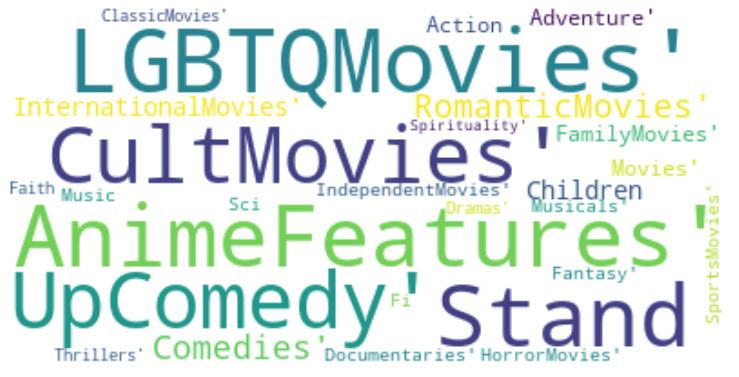

In [122]:
from collections import Counter

genres=list(movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
# mask = np.array(Image.open('../input/masks/star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [123]:
g

Counter({'Documentaries': 658,
         'InternationalMovies': 1797,
         'Comedies': 992,
         'Dramas': 1488,
         'IndependentMovies': 516,
         'Thrillers': 353,
         'Action&Adventure': 532,
         'Children&FamilyMovies': 340,
         'RomanticMovies': 338,
         'Stand-UpComedy': 273,
         'Movies': 55,
         'ClassicMovies': 65,
         'Sci-Fi&Fantasy': 165,
         'AnimeFeatures': 41,
         'SportsMovies': 149,
         'CultMovies': 42,
         'HorrorMovies': 229,
         'Music&Musicals': 229,
         'LGBTQMovies': 59,
         'Faith&Spirituality': 46})

### Stand Up Comedies 

In [124]:
tag = "Stand-Up Comedy"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
small = df[df["relevant"] == 1]
# small[small["country"] == "United States"][["title", "country","release_year"]]
standup_by_country = small['country'].value_counts()
# stand up comedies by release year
standup_by_year = small['release_year'].value_counts()
standup_by_year = standup_by_year.sort_index(ascending=False)
standup_by_year.head(10)

2019    52
2018    73
2017    66
2016    38
2015    19
2014    10
2013     9
2012    12
2011     6
2010     3
Name: release_year, dtype: int64

In [125]:
# standup_by_country.to_csv("standup_by_country.csv")
# standup_by_year.head(10).to_csv("standup_by_year.csv")

# TV shows with the most number of seasons

In [126]:
movies['duration']=movies['duration'].str.replace(' min','')
movies['duration']=movies['duration'].astype(str).astype(int)

C:\Users\harsh\AppData\Local\Temp/ipykernel_28464/4171710152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].str.replace(' min','')
C:\Users\harsh\AppData\Local\Temp/ipykernel_28464/4171710152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].astype(str).astype(int)


In [182]:
longest = movies[['title', 'duration']].sort_values(by=['duration'], ascending=False)
longest.set_index('title', inplace=True)
lhead = longest.head(100)
ltail = longest.tail(1000)
newlongest = pd.concat([lhead, ltail], axis=0)
newlongest.to_csv("longest_duration_nodes.csv")
# longest.head(50).to_csv("longest_movies.csv")

In [128]:
features=['title','duration']
durations= shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

C:\Users\harsh\AppData\Local\Temp/ipykernel_28464/294837354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
C:\Users\harsh\AppData\Local\Temp/ipykernel_28464/294837354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')


In [129]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

C:\Users\harsh\AppData\Local\Temp/ipykernel_28464/4291655225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)


In [130]:
durations.set_index('title', inplace=True)

In [131]:
# durations['no_of_seasons'].sort_values(ascending=False).head(50).to_csv("no_of_seasons.csv")

# IMDB Ratings

In [132]:
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [133]:
imdb = imdb[['Series_Title','IMDB_Rating', 'Director', 'No_of_Votes', 'Gross', 'Meta_score']]

In [134]:
imdb.head()

,Series_Title,IMDB_Rating,Director,No_of_Votes,Gross,Meta_score
0,The Shawshank Redemption,9.3,Frank Darabont,2343110,"28,341,469",80.0
1,The Godfather,9.2,Francis Ford Coppola,1620367,"134,966,411",100.0
2,The Dark Knight,9.0,Christopher Nolan,2303232,"534,858,444",84.0
3,The Godfather: Part II,9.0,Francis Ford Coppola,1129952,"57,300,000",90.0
4,12 Angry Men,9.0,Sidney Lumet,689845,"4,360,000",96.0


In [135]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,relevant
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,0
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,0
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,0
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,0


In [141]:
newimdb = imdb.set_index('Series_Title')
newdf = df.set_index('title')

In [143]:
x = newdf.join(newimdb)
x.isnull().sum()

show_id            0
director        1901
cast             556
country            0
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
relevant           0
IMDB_Rating     5737
Director        5737
No_of_Votes     5737
Gross           5750
Meta_score      5758
dtype: int64

In [153]:
imdbmovies = x[x["type"]=="Movie"]
imdbshows = x[x["type"]=='TV Show']

In [154]:
len(imdbmovies)

3940

In [155]:
imdbmovies.isnull().sum()

show_id            0
director         125
cast             355
country            0
date_added         1
release_year       0
rating             8
duration           0
listed_in          0
description        0
type               0
relevant           0
IMDB_Rating     3851
Director        3851
No_of_Votes     3851
Gross           3860
Meta_score      3870
dtype: int64

In [156]:
imdbshows.isnull().sum()

show_id            0
director        1776
cast             201
country            0
date_added       641
release_year       0
rating             2
duration           0
listed_in          0
description        0
type               0
relevant           0
IMDB_Rating     1886
Director        1886
No_of_Votes     1886
Gross           1890
Meta_score      1888
dtype: int64

In [157]:
imdbshows.head()

,show_id,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,relevant,IMDB_Rating,Director,No_of_Votes,Gross,Meta_score
100% Hotter,80234414,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",2017,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",TV Show,0,NaN,NaN,NaN,NaN,NaN
12 Years Promise,80098046,NaN,"So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...",South Korea,"May 22, 2017",2014,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A pregnant teen is forced by her family to lea...,TV Show,0,NaN,NaN,NaN,NaN,NaN
13 Reasons Why,80117470,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,NaN,2019,TV-MA,3 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","After a teenage girl's perplexing suicide, a c...",TV Show,0,NaN,NaN,NaN,NaN,NaN
13 Reasons Why: Beyond the Reasons,80996791,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,NaN,2019,TV-MA,3 Seasons,"Crime TV Shows, Docuseries","Cast members, writers, producers and mental he...",TV Show,0,NaN,NaN,NaN,NaN,NaN
1983,80205593,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",TV Show,0,NaN,NaN,NaN,NaN,NaN


In [158]:
droppeddf = x.dropna()

In [160]:
droppeddf.isnull().sum()

show_id         0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
relevant        0
IMDB_Rating     0
Director        0
No_of_Votes     0
Gross           0
Meta_score      0
dtype: int64

In [171]:
droppeddf.head()

,show_id,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,relevant,IMDB_Rating,Director,No_of_Votes,Gross,Meta_score
3 Idiots,70121522,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,"August 1, 2019",2009,PG-13,164 min,"Comedies, Dramas, International Movies",While attending one of India's premier college...,Movie,0,8.4,Rajkumar Hirani,344445.0,"6,532,908",67.0
50/50,70202141,Jonathan Levine,"Joseph Gordon-Levitt, Seth Rogen, Anna Kendric...",United States,"June 1, 2019",2011,R,100 min,"Comedies, Dramas, Independent Movies",An otherwise healthy twentysomething has a com...,Movie,0,7.6,Jonathan Levine,315426.0,"35,014,192",72.0
About Time,70261674,Richard Curtis,"Domhnall Gleeson, Rachel McAdams, Bill Nighy, ...",United Kingdom,"April 16, 2019",2013,R,123 min,"Comedies, Dramas, International Movies",When Tim learns that the men in his family can...,Movie,0,7.8,Richard Curtis,303032.0,"15,322,921",55.0
American History X,18002692,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angel...",United States,"November 1, 2019",1998,R,119 min,Dramas,A neo-Nazi gets sent to prison for murder and ...,Movie,0,8.5,Tony Kaye,1034705.0,"6,719,864",62.0
American Psycho,60000861,Mary Harron,"Christian Bale, Willem Dafoe, Jared Leto, Rees...","United States, Canada","September 1, 2019",2000,R,102 min,"Comedies, Cult Movies, Dramas",With chiseled good looks that belie his insani...,Movie,0,7.6,Mary Harron,490062.0,"15,070,285",64.0


In [176]:
# droppeddf[['IMDB_Rating', 'Gross']].head(300).to_csv("gross+rating.csv")
# droppeddf[['IMDB_Rating', 'director']].head(300).to_csv("director+rating.csv")
# droppeddf[['IMDB_Rating', 'Meta_score']].head(300).to_csv("meta+rating.csv")